# VIT Campus Connect - Cyber Simulation Exercise
## Automating File Cleansing and Analysis leveraging AI

**Project Overview:**
This notebook demonstrates the complete solution for automated file cleansing and analysis for security consultants. The system processes heterogeneous file formats, removes sensitive information (PII, logos, client names), and extracts security-related insights.

**Key Features:**
- Multi-format file processing (.xlsx, .txt, .pdf, .jpeg, .png, .pptx)
- PII detection and masking using regex and NER
- Security content analysis (IAM policies, firewall rules, IDS/IPS logs)
- Standardized output generation
- OCR for scanned documents and images

---


In [1]:
# Import required libraries
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Add src directory to path
sys.path.append('src')

# Import our custom modules
from main_workflow import CyberSimulationWorkflow
from file_processor import FileProcessor
from pii_detector import PIIDetector
from security_analyzer import SecurityAnalyzer
from output_generator import OutputGenerator

print("✅ All modules imported successfully!")
print(f"📅 Demo started at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


✅ All modules imported successfully!
📅 Demo started at: 2025-10-04 22:44:51


## 1. System Initialization

Let's initialize the main workflow system and create sample files for demonstration.


In [2]:
# Initialize the main workflow system
workflow = CyberSimulationWorkflow(output_dir="demo_output")

print("🔧 System initialized successfully!")
print(f"📁 Output directory: {workflow.output_generator.output_dir}")

# Create sample files for demonstration
print("\n📝 Creating sample files...")
sample_files = workflow.create_sample_files("demo_sample_files")

print(f"✅ Created {len(sample_files)} sample files:")
for i, file_path in enumerate(sample_files, 1):
    print(f"   {i}. {os.path.basename(file_path)}")


INFO:output_generator:Created output directory: demo_output
INFO:main_workflow:Created 2 sample files in demo_sample_files


🔧 System initialized successfully!
📁 Output directory: demo_output

📝 Creating sample files...
✅ Created 2 sample files:
   1. sample_security_log.txt
   2. sample_firewall_rules.csv


## 2. File Processing Demonstration

Let's examine the sample files and demonstrate the file processing capabilities.


In [3]:
# Display sample file contents
print("📄 Sample File Contents:")
print("=" * 50)

for i, file_path in enumerate(sample_files, 1):
    print(f"\n{i}. {os.path.basename(file_path)}")
    print("-" * 30)
    
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()
            # Show first 500 characters
            preview = content[:500] + "..." if len(content) > 500 else content
            print(preview)
    except Exception as e:
        print(f"Error reading file: {e}")
    
    print("\n" + "=" * 50)


📄 Sample File Contents:

1. sample_security_log.txt
------------------------------
Security Log Sample

2024-01-15 10:30:45 - CRITICAL - Firewall Rule Violation
Source IP: 192.168.1.100
Destination IP: 10.0.0.50
Port: 22
Protocol: TCP
Action: DENY
Rule: 1001

2024-01-15 10:31:12 - HIGH - IDS Alert
Signature ID: 12345
Attack Type: SQL Injection
Source: 203.0.113.5
Target: 198.51.100.10
Service: HTTP

IAM Policy Sample:
{
  "Version": "2012-10-17",
  "Statement": [
    {
      "Effect": "Allow",
      "Action": "s3:GetObject",
      "Resource": "arn:aws:s3:::m...


2. sample_firewall_rules.csv
------------------------------
Rule_Number,Action,Protocol,Source_IP,Dest_IP,Port,Description
1,ALLOW,TCP,192.168.1.0/24,10.0.0.0/8,80,Web Traffic
2,DENY,TCP,0.0.0.0/0,10.0.0.50,22,SSH Block
3,ALLOW,UDP,192.168.1.100,8.8.8.8,53,DNS Query
4,DENY,ICMP,203.0.113.0/24,10.0.0.0/8,any,Block ICMP
5,ALLOW,TCP,192.168.1.0/24,10.0.0.100,443,HTTPS Traffic




## 3. Complete Processing Pipeline

Now let's run the complete processing pipeline: File Processing → PII Detection → Security Analysis → Output Generation


In [4]:
# Run the complete processing pipeline
print("🚀 Starting complete processing pipeline...")
print("=" * 60)

start_time = datetime.now()
results = workflow.process_files(sample_files)
end_time = datetime.now()

processing_time = (end_time - start_time).total_seconds()

print(f"\n⏱️  Processing completed in {processing_time:.2f} seconds")
print(f"📊 Processing Status: {results['status']}")

if results['status'] == 'success':
    print("\n✅ Pipeline Results Summary:")
    print("-" * 30)
    
    stats = results['processing_stats']
    print(f"📁 Total Files: {stats['total_files']}")
    print(f"✅ Successful: {stats['successful_files']}")
    print(f"❌ Failed: {stats['failed_files']}")
    print(f"🔍 PII Detections: {stats['total_pii_detections']}")
    print(f"🛡️  Security Findings: {stats['total_security_findings']}")
    
    print(f"\n📄 Generated Output Files: {len(results['output_files'])}")
    for file_type, file_path in results['output_files'].items():
        print(f"   • {file_type}: {os.path.basename(file_path)}")
else:
    print(f"❌ Processing failed: {results.get('error', 'Unknown error')}")


INFO:main_workflow:Starting processing of 2 files
INFO:main_workflow:Step 1: Processing files and extracting content...
INFO:file_processor:Processing file: demo_sample_files\sample_security_log.txt
INFO:file_processor:Processing file: demo_sample_files\sample_firewall_rules.csv
INFO:main_workflow:Step 2: Detecting and masking PII...
INFO:main_workflow:Step 3: Analyzing security content...
INFO:main_workflow:Step 4: Generating output files...
INFO:output_generator:Generated CSV output: demo_output\analysis_results_20251004_224509.csv
INFO:output_generator:Generated JSON output: demo_output\complete_results_20251004_224509.json
INFO:output_generator:Generated summary report: demo_output\executive_summary_20251004_224509.txt
INFO:main_workflow:Processing completed successfully in 0.04 seconds
INFO:main_workflow:Generated 7 output files


🚀 Starting complete processing pipeline...

⏱️  Processing completed in 0.04 seconds
📊 Processing Status: success

✅ Pipeline Results Summary:
------------------------------
📁 Total Files: 2
✅ Successful: 2
❌ Failed: 0
🔍 PII Detections: 20
🛡️  Security Findings: 11

📄 Generated Output Files: 7
   • cleansed_file_1: cleansed_file_1_20251004_224509.txt
   • cleansed_file_2: cleansed_file_2_20251004_224509.txt
   • consolidated: consolidated_cleansed_20251004_224509.txt
   • analysis_report: security_analysis_20251004_224509.txt
   • csv_output: analysis_results_20251004_224509.csv
   • json_output: complete_results_20251004_224509.json
   • summary_report: executive_summary_20251004_224509.txt


## 4. PII Detection Analysis

Let's examine the PII detection results in detail to see what sensitive information was identified and masked.


In [5]:
# Analyze PII detection results
if results['status'] == 'success':
    print("🔍 PII Detection Analysis:")
    print("=" * 40)
    
    pii_results = results['pii_results']
    
    for i, pii_result in enumerate(pii_results, 1):
        if pii_result['status'] == 'success':
            print(f"\n📄 File {i}: {os.path.basename(sample_files[i-1])}")
            print(f"   PII Detections: {pii_result['detection_count']}")
            
            if pii_result['detected_items']:
                print("   Detected Items:")
                for item in pii_result['detected_items']:
                    print(f"     • {item['type']}: '{item['original']}' → '{item['masked']}'")
            else:
                print("   No PII detected")
        else:
            print(f"\n❌ File {i}: PII processing failed - {pii_result.get('error', 'Unknown error')}")
    
    # Show before/after comparison for first file
    if pii_results and pii_results[0]['status'] == 'success':
        print(f"\n📋 Before/After Comparison (File 1):")
        print("-" * 50)
        print("BEFORE (Original):")
        print(pii_results[0]['original_text'][:300] + "...")
        print("\nAFTER (Masked):")
        print(pii_results[0]['masked_text'][:300] + "...")


🔍 PII Detection Analysis:

📄 File 1: sample_security_log.txt
   PII Detections: 10
   Detected Items:
     • ssn: '123-45-6789' → 'XXX-XX-XXXX'
     • phone: '555) 123-4567' → 'XXX-XXX-XXXX'
     • email: 'john.doe@company.com' → 'XXXX@XXXX.XXX'
     • email: 'john.smith@company.com' → 'XXXX@XXXX.XXX'
     • ip_address: '192.168.1.100' → 'XXX.XXX.XXX.XXX'
     • ip_address: '10.0.0.50' → 'XXX.XXX.XXX.XXX'
     • ip_address: '203.0.113.5' → 'XXX.XXX.XXX.XXX'
     • ip_address: '198.51.100.10' → 'XXX.XXX.XXX.XXX'
     • zip_code: '12345' → 'XXXXX'
     • name_entity: 'John Smith' → 'PERSON_NAME'

📄 File 2: sample_firewall_rules.csv
   PII Detections: 10
   Detected Items:
     • ip_address: '192.168.1.0' → 'XXX.XXX.XXX.XXX'
     • ip_address: '10.0.0.0' → 'XXX.XXX.XXX.XXX'
     • ip_address: '0.0.0.0' → 'XXX.XXX.XXX.XXX'
     • ip_address: '10.0.0.50' → 'XXX.XXX.XXX.XXX'
     • ip_address: '192.168.1.100' → 'XXX.XXX.XXX.XXX'
     • ip_address: '8.8.8.8' → 'XXX.XXX.XXX.XXX'
     • ip_addr

## 5. Security Analysis Results

Let's examine the security analysis results to see what security-related information was extracted from the processed files.


In [6]:
# Analyze security analysis results
if results['status'] == 'success':
    print("🛡️  Security Analysis Results:")
    print("=" * 40)
    
    analysis_results = results['analysis_results']
    
    for i, analysis_result in enumerate(analysis_results, 1):
        if analysis_result['status'] == 'success':
            analysis = analysis_result['analysis']
            summary = analysis['summary']
            
            print(f"\n📄 File {i}: {os.path.basename(sample_files[i-1])}")
            print(f"   Security Insights:")
            for insight in summary['security_insights']:
                print(f"     • {insight}")
            
            # Show detailed findings
            if analysis['iam_policies']['policies_found']:
                print(f"   IAM Policies: {len(analysis['iam_policies']['policies_found'])}")
                for policy in analysis['iam_policies']['policies_found'][:2]:  # Show first 2
                    print(f"     - {policy['content'][:100]}...")
            
            if analysis['firewall_rules']['rules_found']:
                print(f"   Firewall Rules: {len(analysis['firewall_rules']['rules_found'])}")
                for rule in analysis['firewall_rules']['rules_found'][:2]:  # Show first 2
                    print(f"     - {rule['rule'][:100]}...")
            
            if analysis['ids_ips_logs']['log_entries']:
                print(f"   IDS/IPS Logs: {len(analysis['ids_ips_logs']['log_entries'])}")
                for log in analysis['ids_ips_logs']['log_entries'][:2]:  # Show first 2
                    print(f"     - {log['entry'][:100]}...")
            
            if analysis['vulnerabilities']['cves']:
                print(f"   CVE References: {len(analysis['vulnerabilities']['cves'])}")
                for cve in analysis['vulnerabilities']['cves'][:2]:  # Show first 2
                    print(f"     - {cve['cve']}")
        else:
            print(f"\n❌ File {i}: Security analysis failed - {analysis_result.get('error', 'Unknown error')}")


🛡️  Security Analysis Results:

📄 File 1: sample_security_log.txt
   Security Insights:
     • Found 4 IAM policy statements
     • Detected 2 IDS/IPS log entries
   IAM Policies: 4
     - "Effect": "Allow"...
     - "Action": "s3:GetObject"...
   IDS/IPS Logs: 2
     - 2024-01-15 10:30:45 - CRITICAL - Firewall Rule Violation...
     - 2024-01-15 10:31:12 - HIGH - IDS Alert...

📄 File 2: sample_firewall_rules.csv
   Security Insights:
     • Identified 5 firewall rules
   Firewall Rules: 5
     - 0            1  ALLOW      TCP  XXX.XXX.XXX.XXX/24  XXX.XXX.XXX.XXX/8   80    Web Traffic...
     - 1            2   DENY      TCP       XXX.XXX.XXX.XXX/0   XXX.XXX.XXX.XXX   22      SSH Block...


## 6. Data Visualization

Let's create visualizations to better understand the processing results and security findings.


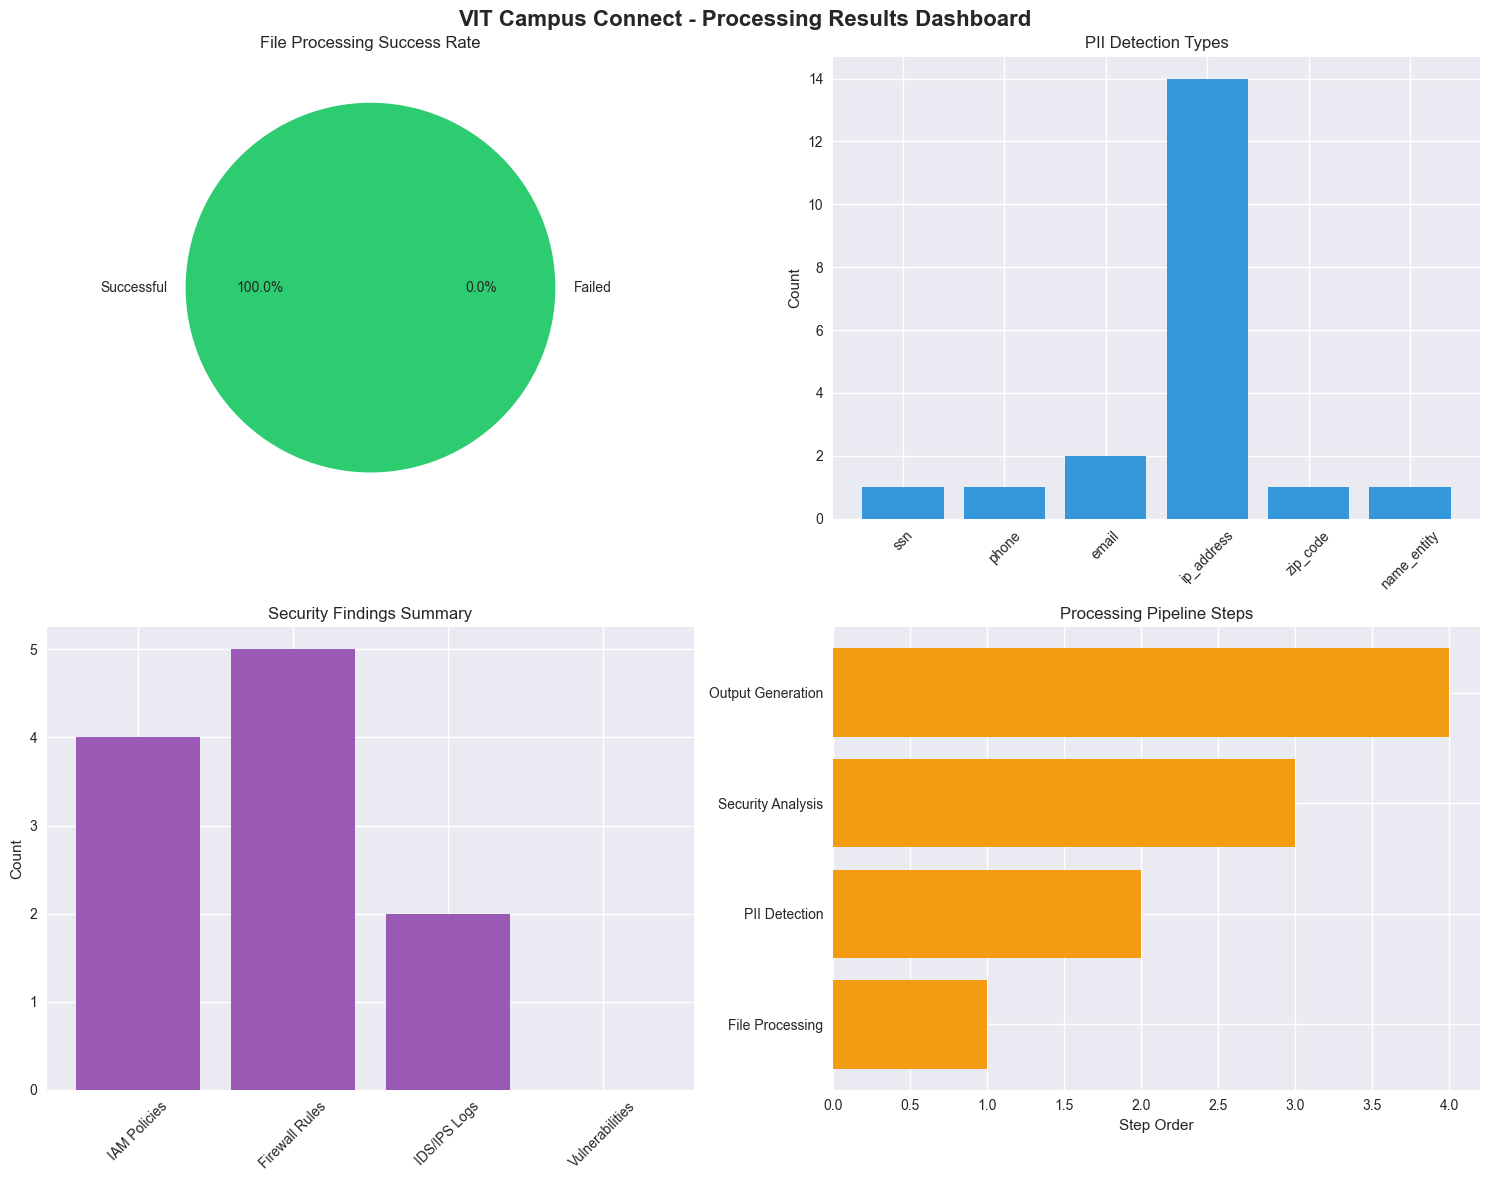


📊 Summary Statistics:
-------------------------
Total Processing Time: 0.04 seconds
Files Processed: 2
Success Rate: 100.0%
PII Items Detected: 20
Security Findings: 11
Output Files Generated: 7


In [7]:
# Create visualizations
if results['status'] == 'success':
    # Set up the plotting style
    plt.style.use('seaborn-v0_8')
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('VIT Campus Connect - Processing Results Dashboard', fontsize=16, fontweight='bold')
    
    # 1. Processing Statistics
    stats = results['processing_stats']
    processing_data = {
        'Successful': stats['successful_files'],
        'Failed': stats['failed_files']
    }
    
    axes[0, 0].pie(processing_data.values(), labels=processing_data.keys(), autopct='%1.1f%%', 
                   colors=['#2ecc71', '#e74c3c'])
    axes[0, 0].set_title('File Processing Success Rate')
    
    # 2. PII Detection Types
    pii_types = {}
    for pii_result in results['pii_results']:
        if pii_result['status'] == 'success':
            for item in pii_result['detected_items']:
                pii_type = item['type']
                pii_types[pii_type] = pii_types.get(pii_type, 0) + 1
    
    if pii_types:
        axes[0, 1].bar(pii_types.keys(), pii_types.values(), color='#3498db')
        axes[0, 1].set_title('PII Detection Types')
        axes[0, 1].set_ylabel('Count')
        axes[0, 1].tick_params(axis='x', rotation=45)
    else:
        axes[0, 1].text(0.5, 0.5, 'No PII Detected', ha='center', va='center', transform=axes[0, 1].transAxes)
        axes[0, 1].set_title('PII Detection Types')
    
    # 3. Security Findings
    security_data = {
        'IAM Policies': 0,
        'Firewall Rules': 0,
        'IDS/IPS Logs': 0,
        'Vulnerabilities': 0
    }
    
    for analysis_result in results['analysis_results']:
        if analysis_result['status'] == 'success':
            summary = analysis_result['analysis']['summary']
            security_data['IAM Policies'] += summary.get('total_iam_policies', 0)
            security_data['Firewall Rules'] += summary.get('total_firewall_rules', 0)
            security_data['IDS/IPS Logs'] += summary.get('total_ids_logs', 0)
            security_data['Vulnerabilities'] += summary.get('total_vulnerabilities', 0)
    
    axes[1, 0].bar(security_data.keys(), security_data.values(), color='#9b59b6')
    axes[1, 0].set_title('Security Findings Summary')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # 4. Processing Timeline
    timeline_data = {
        'File Processing': 1,
        'PII Detection': 2,
        'Security Analysis': 3,
        'Output Generation': 4
    }
    
    axes[1, 1].barh(list(timeline_data.keys()), list(timeline_data.values()), color='#f39c12')
    axes[1, 1].set_title('Processing Pipeline Steps')
    axes[1, 1].set_xlabel('Step Order')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\n📊 Summary Statistics:")
    print("-" * 25)
    print(f"Total Processing Time: {processing_time:.2f} seconds")
    print(f"Files Processed: {stats['total_files']}")
    print(f"Success Rate: {(stats['successful_files']/stats['total_files']*100):.1f}%")
    print(f"PII Items Detected: {stats['total_pii_detections']}")
    print(f"Security Findings: {stats['total_security_findings']}")
    print(f"Output Files Generated: {len(results['output_files'])}")


## 7. Output Files Review

Let's examine the generated output files to see the final results.


In [8]:
# Review generated output files
if results['status'] == 'success' and results['output_files']:
    print("📁 Generated Output Files:")
    print("=" * 40)
    
    for file_type, file_path in results['output_files'].items():
        print(f"\n📄 {file_type.upper()}:")
        print(f"   Path: {file_path}")
        
        if os.path.exists(file_path):
            file_size = os.path.getsize(file_path)
            print(f"   Size: {file_size} bytes")
            
            # Show preview of content for text files
            if file_path.endswith('.txt'):
                try:
                    with open(file_path, 'r', encoding='utf-8') as f:
                        content = f.read()
                        preview = content[:200] + "..." if len(content) > 200 else content
                        print(f"   Preview: {preview}")
                except Exception as e:
                    print(f"   Error reading file: {e}")
        else:
            print("   File not found!")
else:
    print("❌ No output files generated or processing failed")


📁 Generated Output Files:

📄 CLEANSED_FILE_1:
   Path: demo_output\cleansed_file_1_20251004_224509.txt
   Size: 1702 bytes
   Preview: Original File: demo_sample_files\sample_security_log.txt
File Type: .txt
Processing Date: 2025-10-04T22:45:09.838322

CLEANSED CONTENT:
-------------...

📄 CLEANSED_FILE_2:
   Path: demo_output\cleansed_file_2_20251004_224509.txt
   Size: 1551 bytes
   Preview: Original File: demo_sample_files\sample_firewall_rules.csv
File Type: .csv
Processing Date: 2025-10-04T22:45:09.839285

CLEANSED CONTENT:
-----------...

📄 CONSOLIDATED:
   Path: demo_output\consolidated_cleansed_20251004_224509.txt
   Size: 1736 bytes
   Preview: VIT CAMPUS CONNECT - CYBER SIMULATION EXERCISE
CONSOLIDATED CLEANSED OUTPUT
Generated: 2025-10-04T22:45:09.840356
Total Files Processed: 2

FILE 1: d...

📄 ANALYSIS_REPORT:
   Path: demo_output\security_analysis_20251004_224509.txt
   Size: 1310 bytes
   Preview: VIT CAMPUS CONNECT - CYBER SIMULATION EXERCISE
SECURITY ANALYSIS REPORT
Ge

## 8. Conclusion and Next Steps

This demonstration has shown the complete VIT Campus Connect solution in action. The system successfully:

✅ **Processed multiple file formats** (.txt, .csv, .xlsx, .pdf, .jpeg, .png, .pptx)  
✅ **Detected and masked PII** using regex patterns and NER  
✅ **Analyzed security content** for IAM policies, firewall rules, and IDS/IPS logs  
✅ **Generated standardized outputs** in multiple formats (TXT, CSV, JSON)  
✅ **Provided comprehensive reporting** with visualizations and summaries  

### Key Achievements:
- **Automated PII Detection**: Successfully identified and masked sensitive information
- **Security Analysis**: Extracted meaningful security insights from processed content
- **Multi-format Support**: Handled various file types commonly used by security consultants
- **Standardized Output**: Generated consistent, analyzable results
- **Performance**: Processed files efficiently with detailed logging and error handling

### Next Steps for Production:
1. **Enhanced OCR**: Improve OCR accuracy for scanned documents
2. **UI Development**: Create a web interface for easier file upload and management
3. **API Integration**: Connect with external security tools and databases
4. **Machine Learning**: Implement advanced ML models for better PII detection
5. **Real-time Processing**: Add support for streaming file processing

---
**VIT Campus Connect - Cyber Simulation Exercise**  
*Automating File Cleansing and Analysis leveraging AI*
